### How to calculate entropy (sample method)

In [2]:
from scipy.stats import entropy
entropy([5, 5], base=2)

1.0

In [3]:
#UDF(User Defined Function) for Calculating entropy
import math
def Entropy(X):  #Entropy = -(Pi*logPi)  - [Pi = x/sum(X)]
    entropy=0
    total=sum(X)
    for x in X:
        entropy+=(x/total)*math.log2(x/total)
    entropy=entropy*(-1)
    return(entropy)
Entropy([5,5])

1.0

# Random Forest Classifier - Customer Churn

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### EDA

In [7]:
data=pd.read_csv("data/TelecomCustomerChurn.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
data.duplicated().sum()

0

In [10]:
data.columns
# Churn is our target

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [11]:
# data['TotalCharges'].astype('float64')


# ValueError: could not convert string to float: ' '

In [12]:
data[data['TotalCharges']==' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [13]:
data.isin([" "]).sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [14]:
data['TotalCharges'] = data['TotalCharges'].replace(' ', np.nan).astype(float).values

(array([2709., 1228.,  671.,  508.,  454.,  412.,  395.,  310.,  223.,
         122.]),
 array([  18.8,  885.4, 1752. , 2618.6, 3485.2, 4351.8, 5218.4, 6085. ,
        6951.6, 7818.2, 8684.8]),
 <BarContainer object of 10 artists>)

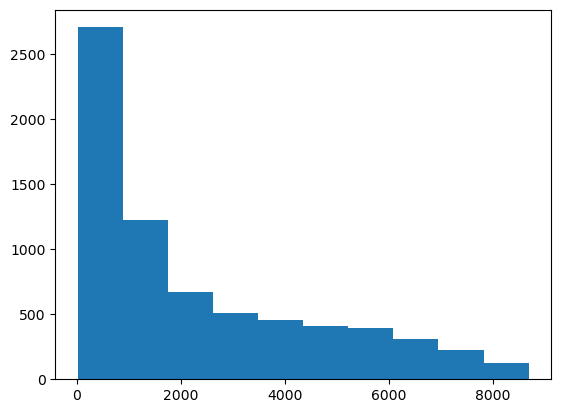

In [15]:
plt.hist(data['TotalCharges'])

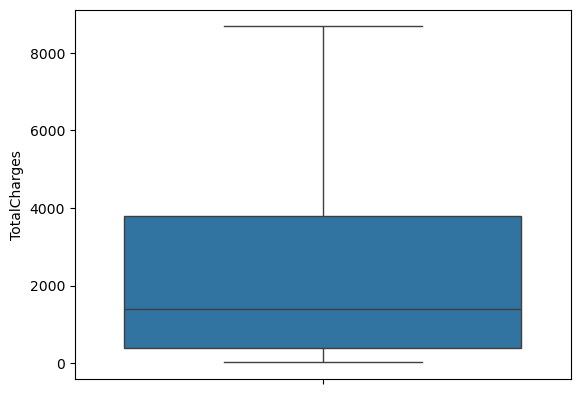

In [16]:
import seaborn as sns
sns.boxplot(data['TotalCharges'])
plt.show()

In [17]:
data['TotalCharges'].mean()

2283.3004408418656

In [18]:
data['TotalCharges'].median()

1397.475

In [19]:
data['TotalCharges'].min()

18.8

In [20]:
data['TotalCharges'].max()

8684.8

In [21]:
data.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [22]:
data['TotalCharges']=data['TotalCharges'].fillna(data['TotalCharges'].mean())

In [23]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [24]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [25]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [26]:
data['SeniorCitizen']=data['SeniorCitizen'].map({0:'No',1:'Yes'})

In [27]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [28]:
data.dtypes

customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [29]:
#backup
databackup=data.copy()

### Splitting X and Y

In [31]:
X=data.drop(['customerID','Churn'],axis=1)
y=data['Churn']

In [32]:
X=pd.get_dummies(X,drop_first=True)

In [33]:
X.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,False,False,True,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False
1,34,56.95,1889.50,True,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,True
2,2,53.85,108.15,True,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,True
3,45,42.30,1840.75,True,False,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
4,2,70.70,151.65,False,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,True,False


In [34]:
# Things to do:
#split data for training and testing
#create RFC model
#train and predict
#check evaluation matrix

### Splitting train and test data

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=42) #0.67 data will be for training.

###  Random Forest Classifier 

In [38]:
#importing Random Forest Classifier from sklearn.ensemble
from sklearn.model_selection import GridSearchCV #GridSearchCV is for parameter tuning
from sklearn.ensemble import RandomForestClassifier
cls=RandomForestClassifier()

n_estimators=[25,50,75,100] #each is the number of decision trees in the forest, default = 100
criterion=['gini','entropy'] #criteria for choosing nodes default = 'gini'
max_depth=[3,5,10] #maximum number of nodes/stump/layer in a tree default = None (it will go till all possible nodes)

parameters={'n_estimators': n_estimators,'criterion':criterion,'max_depth':max_depth} #this will undergo 4*2*3 = 24 iterations
RFC_cls = GridSearchCV(cls, parameters)
RFC_cls.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10],
                         'n_estimators': [25, 50, 75, 100]})

In [39]:
#to get the best parameter for the model
RFC_cls.best_params_

{'criterion': 'gini', 'max_depth': 10, 'n_estimators': 50}

In [40]:
from sklearn.ensemble import RandomForestClassifier
cls=RandomForestClassifier(n_estimators=100,criterion='entropy',max_depth=10)

In [41]:
cls.fit(X_train,y_train)
y_pred=cls.predict(X_test)

In [42]:
#confusison matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[1550,  147],
       [ 307,  321]], dtype=int64)

In [43]:
#accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8047311827956989

### Model with implementation of SMOTE

In [46]:
y_train.value_counts()

Churn
No     3477
Yes    1241
Name: count, dtype: int64

In [115]:
# How to implement SMOTE?
# https://pypi.org/project/imbalanced-learn/
# pip install imbalanced-learn

In [47]:
#SMOTE for data balancing  - Synthetic Minority Over-sampling Technique
#there are 3477 class No and 1241 class Yes - so the data is imbalanced.
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train) #here both class 0 and class 1 are 236.data is balanced

In [48]:
#importing Random Forest Classifier from sklearn.ensemble
from sklearn.model_selection import GridSearchCV #GridSearchCV is for parameter tuning
from sklearn.ensemble import RandomForestClassifier
cls=RandomForestClassifier()
n_estimators=[25,50,75,100,125,150,175,200] #number of decision trees in the forest, default = 100
criterion=['gini','entropy'] #criteria for choosing nodes default = 'gini'
max_depth=[3,5,10] #maximum number of nodes in a tree default = None (it will go till all possible nodes)
parameters={'n_estimators': n_estimators,'criterion':criterion,'max_depth':max_depth} #this will undergo 8*2*3 = 48 iterations
RFC_cls = GridSearchCV(cls, parameters)
RFC_cls.fit(X_res,y_res)


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10],
                         'n_estimators': [25, 50, 75, 100, 125, 150, 175, 200]})

In [49]:
#to get the best parameter for the model
RFC_cls.best_params_

{'criterion': 'gini', 'max_depth': 10, 'n_estimators': 25}

In [50]:
cls=RandomForestClassifier(n_estimators=175,criterion='entropy',max_depth=10)
cls.fit(X_res,y_res)
y_pred=cls.predict(X_test)
accuracy_score(y_test,y_pred)*100

78.92473118279571

In [51]:
confusion_matrix(y_test,y_pred)

array([[1391,  306],
       [ 184,  444]], dtype=int64)

In [113]:
# sometimes accuracy score and confusion matrix is not enough to predict the model best of not..so we use precision ,recall,F1 score

In [52]:
#precision,Recall,F1 Score
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test,y_pred)

(array([0.8831746, 0.592    ]),
 array([0.81968179, 0.70700637]),
 array([0.8502445 , 0.64441219]),
 array([1697,  628], dtype=int64))

In [53]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          No       0.88      0.82      0.85      1697
         Yes       0.59      0.71      0.64       628

    accuracy                           0.79      2325
   macro avg       0.74      0.76      0.75      2325
weighted avg       0.80      0.79      0.79      2325



### ROU AUC SCORE

In [55]:
from sklearn.metrics import roc_auc_score

In [56]:
rfc_probs = cls.predict_proba(X_test)
rfc_probs

array([[0.26524363, 0.73475637],
       [0.8953156 , 0.1046844 ],
       [0.98636065, 0.01363935],
       ...,
       [0.32305737, 0.67694263],
       [0.46431442, 0.53568558],
       [0.51676694, 0.48323306]])

In [57]:
rfc_probs=rfc_probs[:,1]
rfc_probs

array([0.73475637, 0.1046844 , 0.01363935, ..., 0.67694263, 0.53568558,
       0.48323306])

In [58]:
rcs_auc = roc_auc_score(y_test, rfc_probs)
rcs_auc

0.8576609528242047

In [59]:
Results= pd.DataFrame(columns=['Actual','Predicted'])
Results['Actual']=y_test
Results['Predicted']=y_pred
Results['Id']=Results.index
Results.head()

,Actual,Predicted,Id
185,Yes,Yes,185
2715,No,No,2715
3825,No,No,3825
1807,Yes,Yes,1807
132,No,No,132


In [60]:
# END